#  Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#  Key attributes of the database

Key attributes of the database

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

# Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
# Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape

(907, 27)

#  There is 907 rows and 27 columns present in the dataset

In [4]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# 
other_fuel1, other_fuel2, other_fuel3,commissioning_year,owner,wepp_id,

year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,

generation_gwh_2015 , generation_gwh_2016, generation_gwh_2017,

 generation_gwh_2018, generation_data_source, estimated_generation_gwh
 
More than 50 percent of null value present in the dataset so better we drop this column

In [5]:
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','commissioning_year','owner','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_data_source','estimated_generation_gwh','generation_gwh_2019'],axis=1, inplace=True)

In [6]:
df.isna().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             907 non-null    object 
 1   country_long        907 non-null    object 
 2   name                907 non-null    object 
 3   gppd_idnr           907 non-null    object 
 4   capacity_mw         907 non-null    float64
 5   latitude            861 non-null    float64
 6   longitude           861 non-null    float64
 7   primary_fuel        907 non-null    object 
 8   source              907 non-null    object 
 9   url                 907 non-null    object 
 10  geolocation_source  888 non-null    object 
dtypes: float64(3), object(8)
memory usage: 78.1+ KB


Based on the provided information, it seems to be a description of a dataset with several columns, including the column names and their corresponding data types. Here's a breakdown of the columns:

country: Categorical variable representing the country. It has 907 non-null values and is of type object.

country_long: Categorical variable representing the long-form name of the country. It has 907 non-null values and is of type object.

name: Categorical variable representing the name. It has 907 non-null values and is of type object.

gppd_idnr: Categorical variable representing an ID number. It has 907 non-null values and is of type object.

capacity_mw: Numeric variable representing the capacity in megawatts. It has 907 non-null values and is of type float64.

latitude: Numeric variable representing the latitude. It has 861 non-null values and is of type float64.

longitude: Numeric variable representing the longitude. It has 861 non-null values and is of type float64.

primary_fuel: Categorical variable representing the primary fuel source. It has 907 non-null values and is of type object.

source: Categorical variable representing the data source. It has 907 non-null values and is of type object.

url: Categorical variable representing the URL. It has 907 non-null values and is of type object.

geolocation_source: Categorical variable representing the source of geolocation data. It has 888 non-null values and is of type object.

This information provides an overview of the dataset's columns and their corresponding data types.

In [8]:
from sklearn.impute import SimpleImputer
column = df[['latitude', 'longitude']]
imputer = SimpleImputer(strategy='mean')
df[['latitude', 'longitude']] = imputer.fit_transform(column)



In [9]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)


In [10]:
df.isna().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

In [11]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

In [12]:
for i in df.columns:
    print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0      IND
1      IND
2      IND
3      IND
4      IND
      ... 
902    IND
903    IND
904    IND
905    IND
906    IND
Name: country, Length: 907, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      India
1      India
2      India
3      India
4      India
       ...  
902    India
903    India
904    India
905    India
906    India
Name: country_long, Length: 907, dtype: object>
<bound method IndexOpsMixin.value_counts of 0                  ACME Solar Tower
1               ADITYA CEMENT WORKS
2          AES Saurashtra Windfarms
3                       AGARTALA GT
4                      AKALTARA TPP
                   ...             
902                    YERMARUS TPP
903    Yelesandra Solar Power Plant
904    Yelisirur wind power project
905                     ZAWAR MINES
906         iEnergy Theni Wind Farm
Name: name, Length: 907, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      WRI1020239
1      WRI10198

In [13]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'source', 'url',
       'geolocation_source'],
      dtype='object')

#  country and country_long  in this column only 1 value and url is link this company so we drop this column

In [14]:
df['name'].nunique()

907

In [15]:
df['gppd_idnr'].nunique()

907

#  we drop this name and gppd_idnr column cause there all unique value to each 

In [16]:
df.drop(columns=['country','country_long','url','name','gppd_idnr'],axis=1,inplace=True)

In [17]:
df.describe()

,capacity_mw,latitude,longitude
count,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907
std,590.085456,6.079148,4.812291
min,0.000000,8.168900,68.644700
25%,16.725000,17.072000,74.388900
50%,59.200000,21.281800,76.979200
75%,385.250000,25.176450,79.206100
max,4760.000000,34.649000,95.408000


#  
The summary of the dataset looks almost perfect since there is no negative value present in dataset from the above desccription we observed the following :
the counts of the all columns are same which means there is no missing value in the dataset

#  EDA

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

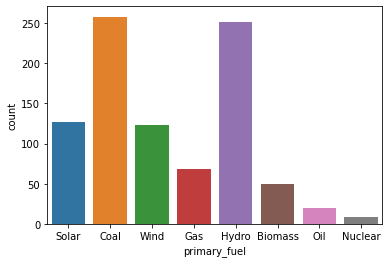

In [18]:
sns.countplot(data=df,x='primary_fuel')
df['primary_fuel'].value_counts()

# when we build classification promblem then we fix data imbalance 

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

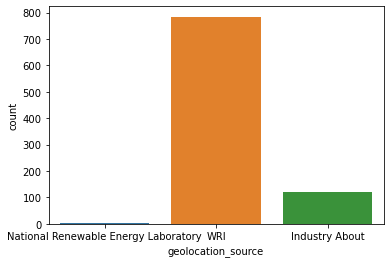

In [19]:
sns.countplot(data=df,x='geolocation_source')
df['geolocation_source'].value_counts()

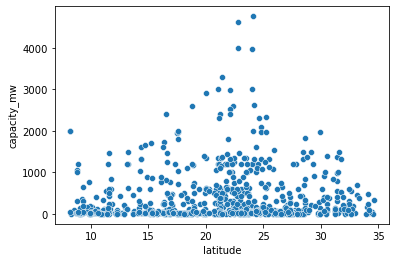

In [20]:
sns.scatterplot(data=df,x='latitude',y='capacity_mw')
plt.show()

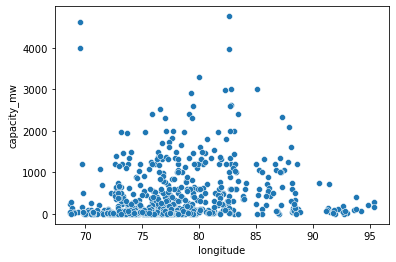

In [21]:
sns.scatterplot(data=df,x='longitude',y='capacity_mw')
plt.show()

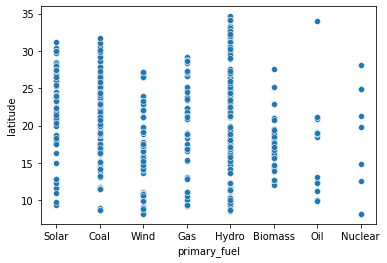

In [22]:
sns.scatterplot(data=df,x='primary_fuel',y='latitude')
plt.show()

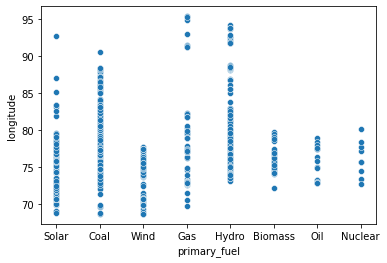

In [23]:
sns.scatterplot(data=df,x='primary_fuel',y='longitude')
plt.show()

In [24]:
catgorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catgorical_col.append(i)
        
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !='object':
        numerical_col.append(i)

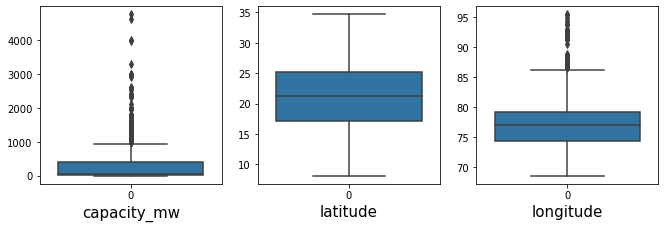

In [25]:
plt.figure(figsize=(15,15))
i=1
for column in numerical_col:
    if i<=12:
        
        
    
        plt.subplot(4,4,i)
    
        ax=sns.boxplot(data=df[column])
    
        plt.xlabel (column,fontsize=15)
        
    i+=1
    
plt.show()
    
                
                


#  We found outliers in longtitude columns we have to reduce it

# Encoding process

In [26]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
for i in catgorical_col:
    df[i] = lm.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,73.2407,6,109,1
1,98.0,24.7663,74.6090,1,174,2
2,39.2,21.9038,69.3732,7,21,2
3,135.0,23.8712,91.3602,2,22,2
4,1800.0,21.9603,82.4091,1,22,2


In [27]:
x=df.drop(columns='primary_fuel')
y=df['primary_fuel']

In [28]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(907, 5)

In [29]:
threshold=3
print(np.where(z>3))

(array([ 15,  71,  80, 143, 147, 179, 183, 191, 209, 244, 299, 308, 321,
       323, 333, 340, 345, 360, 363, 364, 375, 416, 427, 482, 493, 494,
       499, 519, 546, 577, 638, 648, 657, 661, 669, 689, 695, 726, 767,
       786, 788, 808, 818, 832, 847, 870, 871, 879, 880, 895, 900],
      dtype=int64), array([0, 3, 3, 0, 0, 2, 2, 3, 0, 2, 3, 0, 3, 2, 2, 2, 3, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 2, 3,
       2, 3, 3, 3, 0, 3, 3], dtype=int64))


In [30]:
x=df[(z<3).all(axis=1)]
print(df.shape)
print(x.shape)

(907, 6)
(856, 6)


In [31]:
y=y[(z<3).all(axis=1)]
print(y.shape)

(856,)


#  percentage of data loss:

In [32]:
loss_percent = (907-856)/907*100
loss_percent

5.622932745314222

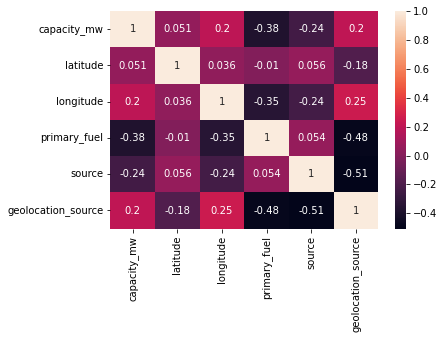

In [33]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#  There is no co-relation to each other

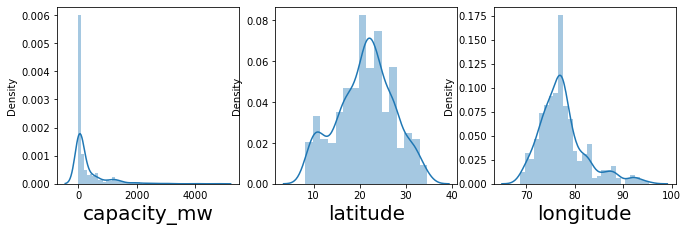

In [34]:
 plt.figure(figsize=(15,15))
plotnumber =1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

# capacity_mw is right skewed and latitude and longitude is looks like normal distrubuted

In [35]:
df.skew()

capacity_mw           3.123576
latitude             -0.149698
longitude             1.141881
primary_fuel          0.472251
source                1.827373
geolocation_source   -2.159841
dtype: float64

#  capacity_mw is very high skewness we hae to reduced skewness

In [36]:
df['capacity_mw'] =np.cbrt(df['capacity_mw'])

In [37]:
df.skew()

capacity_mw           1.013378
latitude             -0.149698
longitude             1.141881
primary_fuel          0.472251
source                1.827373
geolocation_source   -2.159841
dtype: float64

# We solve  capacity_mw skewness promblem

In [38]:
y.value_counts()

3    240
1    234
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

#  There is data imbalance we solve this issue

In [39]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [41]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRs = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    rnd = RandomForestClassifier()
    rnd.fit(x_train, y_train)
    y_pred = rnd.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 1.0 at random_state 1


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [44]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report ,confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [45]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR= LR.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predLR)))
print('\n')
print(confusion_matrix(y_test, predLR))

Accuracy score 0.6145833333333334


[[69  1  0  2  0  0  1  0]
 [ 4 38  6 16  4  0  1  1]
 [ 4 23 14 19  3  9  0  0]
 [ 5  3  6 37  6 10  1 13]
 [ 0  7 10  8 46  0  0  0]
 [ 0  0  0  5  1 46  1 21]
 [ 6  1  0  1  0  4 54  8]
 [ 0  0  0  2  0  1  8 50]]


In [46]:
Rnd= RandomForestClassifier()
Rnd.fit(x_train, y_train)
predRnd= Rnd.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predRnd)))
print('\n')
print(confusion_matrix(y_test, predRnd))

Accuracy score 1.0


[[73  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0]
 [ 0  0 72  0  0  0  0  0]
 [ 0  0  0 81  0  0  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0 74  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 61]]


In [47]:
Etr= ExtraTreesClassifier()
Etr.fit(x_train, y_train)
predEtr= Etr.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predEtr)))
print('\n')
print(confusion_matrix(y_test, predEtr))

Accuracy score 1.0


[[73  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0]
 [ 0  0 72  0  0  0  0  0]
 [ 0  0  0 81  0  0  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0 74  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 61]]


In [48]:
svc=SVC()
svc.fit(x_train, y_train)
predsvc=svc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predsvc)))
print('\n')

print(confusion_matrix(y_test, predsvc))

Accuracy score 0.3732638888888889


[[45  0  0  0  0  0  2 26]
 [ 3  0  9  3 42  5  0  8]
 [ 7  0 23  5 27  3  0  7]
 [ 0  0 14 17 14  0  0 36]
 [ 0  0  4  3 64  0  0  0]
 [14  0  2 24  1  6  0 27]
 [52  0  0  0  1  4  1 16]
 [ 0  0  0  2  0  0  0 59]]


In [49]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predgbc =gbc.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predgbc)))
print('\n')

print(confusion_matrix(y_test, predgbc))

Accuracy score 1.0


[[73  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0]
 [ 0  0 72  0  0  0  0  0]
 [ 0  0  0 81  0  0  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0 74  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 61]]


In [50]:
adaboost= AdaBoostClassifier()
adaboost.fit(x_train, y_train)
predadaboost =adaboost.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predadaboost)))
print('\n')

print(confusion_matrix(y_test, predadaboost))

Accuracy score 0.3541666666666667


[[73  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0]
 [ 0 72  0  0  0  0  0  0]
 [ 0 81  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 61]]


In [51]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
predbagging =bagging.predict (x_test)
print('Accuracy score',(accuracy_score(y_test, predbagging)))
print('\n')

print(confusion_matrix(y_test, predbagging))

Accuracy score 1.0


[[73  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0]
 [ 0  0 72  0  0  0  0  0]
 [ 0  0  0 81  0  0  0  0]
 [ 0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0 74  0  0]
 [ 0  0  0  0  0  0 74  0]
 [ 0  0  0  0  0  0  0 61]]


#  Cross Validation Score

In [52]:
print('LogisticRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predLR)- score.mean())

LogisticRegression 


[0.58854167 0.625      0.55989583 0.59114583 0.56770833]
0.5864583333333334
Difference between Accuracy score  and cross validation score is -  0.028124999999999956


In [53]:
print('ExtraTreesClassifier ')
print('\n')
score=cross_val_score(Rnd, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predRnd)- score.mean())

ExtraTreesClassifier 


[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score  and cross validation score is -  0.0


In [54]:
print('SVC ')
print('\n')
score=cross_val_score(svc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predsvc)- score.mean())

SVC 


[0.359375   0.40364583 0.36458333 0.40885417 0.3671875 ]
0.3807291666666667
Difference between Accuracy score  and cross validation score is -  -0.007465277777777779


In [55]:
print('GradientBoostingClassifier ')
print('\n')
score=cross_val_score(gbc, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predgbc)- score.mean())

GradientBoostingClassifier 


[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score  and cross validation score is -  0.0


In [56]:
print('AdaBoostClassifier ')
print('\n')
score=cross_val_score(adaboost, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predadaboost)- score.mean())

AdaBoostClassifier 


[0.375 0.375 0.375 0.375 0.375]
0.375
Difference between Accuracy score  and cross validation score is -  -0.020833333333333315


In [57]:
print('BaggingClassifier ')
print('\n')
score=cross_val_score(bagging, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', accuracy_score(y_test,predbagging)- score.mean())

BaggingClassifier 


[1. 1. 1. 1. 1.]
1.0
Difference between Accuracy score  and cross validation score is -  0.0


#  Extra tress , Adabooster, Bagging classifier has giving 100 per accuracy and and there is no difference in cross validation score each result gives same accuracy

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters ={'criterion': ['gini','entropy'],
            'random_state': [10,100,850],
            'max_depth':[0,15,30],
            'n_jobs': [-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [60]:
gdsv= GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
gdsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 100, 850]})

In [61]:
gdsv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 850}

In [63]:
Final_model= ExtraTreesClassifier(criterion= 'gini',max_depth= 15,n_estimators = 50  , n_jobs= -2 ,random_state =850)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

100.0


# There is no improvement to use hyperpyrameter tunning

In [64]:
df

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,1.357209,28.1839,73.2407,6,109,1
1,4.610436,24.7663,74.6090,1,174,2
2,3.396999,21.9038,69.3732,7,21,2
3,5.129928,23.8712,91.3602,2,22,2
4,12.164404,21.9603,82.4091,1,22,2
...,...,...,...,...,...,...
902,11.696071,16.2949,77.3568,1,22,2
903,1.442250,12.8932,78.1654,6,77,0
904,2.943383,15.2758,75.5811,7,21,2
905,4.308869,24.3500,73.7477,1,59,2


In [65]:
x= df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,latitude,longitude,primary_fuel,source,geolocation_source
0,1.149805,-0.878280,1.225688,1.460215,-1.083349
1,0.587311,-0.593788,-0.967877,2.917019,0.394241
2,0.116179,-1.682394,1.664401,-0.512075,0.394241
3,0.439989,2.889052,-0.529164,-0.489662,0.394241
4,0.125479,1.027976,-0.967877,-0.489662,0.394241
...,...,...,...,...,...
902,-0.806975,-0.022477,-0.967877,-0.489662,0.394241
903,-1.366853,0.145644,1.225688,0.743019,-2.560940
904,-0.974707,-0.391673,1.664401,-0.512075,0.394241
905,0.518793,-0.772866,-0.967877,0.339596,0.394241


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif ['features'] =x.columns # if u not fill this code 
vif

,vif,features
0,1.057218,latitude
1,1.208294,longitude
2,1.564669,primary_fuel
3,1.511652,source
4,1.964568,geolocation_source


In [68]:
# import libraryies
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [69]:
maxAccu = 0
maxRs = 0

for i in range(1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    acc = r2_score(y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRs = i

print('Best accuracy is', maxAccu, 'at random_state', maxRs)


Best accuracy is 0.44505043310615044 at random_state 152


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)



In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [72]:
LR= LinearRegression()
LR.fit(x_train,y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.44505043310615044
R2_score on training data:  33.600559696785936
MEAN ABSOLUTE ERROR : 1.925883769892339
MEAN SQUARED ERROR : 5.772272989107594
ROOT MEAN SQUARED ERROR : 2.402555512180227


In [73]:
GB= GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_GB) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_GB))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_GB))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_GB)))

R2_score :  0.6430347955267516
R2_score on training data:  77.55262427468132
MEAN ABSOLUTE ERROR : 1.4060242937576397
MEAN SQUARED ERROR : 3.7129511053863617
ROOT MEAN SQUARED ERROR : 1.9269019449329439


In [74]:
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR= RFR.predict(x_test)
pred_train= RFR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RFR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RFR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RFR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RFR)))

R2_score :  0.6236188536219522
R2_score on training data:  93.9495083020191
MEAN ABSOLUTE ERROR : 1.4280145464080636
MEAN SQUARED ERROR : 3.914904802985324
ROOT MEAN SQUARED ERROR : 1.9786118373711716


In [75]:
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR= DTR.predict(x_test)
pred_train= DTR.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LR) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LR))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LR))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LR)))

R2_score :  0.44505043310615044
R2_score on training data:  98.95410397804928
MEAN ABSOLUTE ERROR : 1.925883769892339
MEAN SQUARED ERROR : 5.772272989107594
ROOT MEAN SQUARED ERROR : 2.402555512180227


In [76]:
knn= KNN()
knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_knn) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_knn))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_knn))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_knn)))

R2_score :  0.5473956659954589
R2_score on training data:  68.24510644771827
MEAN ABSOLUTE ERROR : 1.558927299534574
MEAN SQUARED ERROR : 4.70773549126343
ROOT MEAN SQUARED ERROR : 2.1697316634237125


In [77]:
LA= Lasso()
LA.fit(x_train,y_train)
pred_LA= LA.predict(x_test)
pred_train= LA.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_LA) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_LA))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_LA))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_LA)))

R2_score :  0.1891015032921618
R2_score on training data:  14.328266516808352
MEAN ABSOLUTE ERROR : 2.359180369225704
MEAN SQUARED ERROR : 8.434509672029234
ROOT MEAN SQUARED ERROR : 2.904222731132933


In [78]:
RI= Ridge()
RI.fit(x_train,y_train)
pred_RI= RI.predict(x_test)
pred_train= knn.predict(x_train)
print('R2_score : ',r2_score(y_test,pred_RI) )
print('R2_score on training data: ',r2_score(y_train,pred_train)*100)
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(y_test, pred_RI))
print ('MEAN SQUARED ERROR :', mean_squared_error(y_test, pred_RI))
print ('ROOT MEAN SQUARED ERROR :', np.sqrt (mean_squared_error(y_test, pred_RI)))

R2_score :  0.4449524977075867
R2_score on training data:  68.24510644771827
MEAN ABSOLUTE ERROR : 1.9257459660738978
MEAN SQUARED ERROR : 5.773291657991275
ROOT MEAN SQUARED ERROR : 2.4027674997783857


#  CROSS VALIDATION SCORE

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
print('LinearRegression ')
print('\n')
score=cross_val_score(LR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', (r2_score(y_test,pred_LR)- score.mean()))

LinearRegression 


[0.32627511 0.35735724 0.30656824 0.36579199 0.41906636]
0.3550117846442502
Difference between Accuracy score  and cross validation score is -  0.09003864846190024


In [82]:
print('GradientBoostingRegressor ')
print('\n')
score=cross_val_score(GB, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_GB)- score.mean())

GradientBoostingRegressor 


[0.65534879 0.59326765 0.6107883  0.64746239 0.6084746 ]
0.6230683476789494
Difference between Accuracy score  and cross validation score is -  0.019966447847802216


In [83]:
print('RandomForestRegressor ')
print('\n')
score=cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RFR)- score.mean())

RandomForestRegressor 


[0.61104422 0.57704706 0.57943884 0.63025408 0.62378076]
0.6043129933609451
Difference between Accuracy score  and cross validation score is -  0.019305860261007113


In [84]:
print('DecisionTreeRegressor ')
print('\n')
score=cross_val_score(DTR, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_DTR)- score.mean())

DecisionTreeRegressor 


[0.33060895 0.25024468 0.41139259 0.34799745 0.38864815]
0.3457783625770312
Difference between Accuracy score  and cross validation score is -  -0.01748845430726864


In [85]:
print('KNN ')
print('\n')
score=cross_val_score(knn, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_knn)- score.mean())

KNN 


[0.45884694 0.48895446 0.41596641 0.59450072 0.61216663]
0.5140870316456466
Difference between Accuracy score  and cross validation score is -  0.03330863434981224


In [86]:
print('Lasso ')
print('\n')
score=cross_val_score(LA, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_LA)- score.mean())

Lasso 


[0.18527287 0.18408142 0.16375311 0.15658229 0.1836995 ]
0.17467783659766503
Difference between Accuracy score  and cross validation score is -  0.014423666694496767


In [87]:
print('Ridge ')
print('\n')
score=cross_val_score(RI, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score  and cross validation score is - ', r2_score(y_test,pred_RI)- score.mean())

Ridge 


[0.32666195 0.35759134 0.30654344 0.36571342 0.41879319]
0.3550606683819636
Difference between Accuracy score  and cross validation score is -  0.08989182932562312


#  GradientBoostingRegressor  64 percent accuracy and  1.9 cross validation score

In [89]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

gdsv= GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5)
gdsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]})

In [92]:
gdsv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 100,
 'subsample': 0.8}

In [96]:
Final_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, max_features='sqrt',
                                        min_samples_leaf=2, min_samples_split=8,
                                        n_estimators=100, subsample=0.8)


Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = r2_score(y_test, pred)
print(acc * 100)

64.63558526537237


#  hyper pyrametertunning 0.33  increase accuracy